In [0]:
import requests as rq
from datetime import date, timedelta
import datetime as dt
import pandas  as pd
from io import StringIO
import math
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df_from_each_file = list()

date_i = dt.date(2020, 1, 22)

while date_i != date.today():
  res = rq.get('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + date_i.strftime('%m-%d-%Y') + '.csv')
  res_str = res.content.decode('utf-8')
  res_str = res_str.replace('Province/State', 'Province_State').replace('Country/Region', 'Country_Region').replace('Last Update', 'Last_Update').replace('Latitude', 'Lat').replace('Longitude', 'Long_')
  res_str_IO = StringIO(res_str)
  df = pd.read_csv(res_str_IO, delimiter=',', quotechar='"')
  df['date'] = date_i
  df_from_each_file.append(df)
  date_i = date_i + timedelta(days=1)

concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
concatenated_df

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,date,Lat,Long_,FIPS,Admin2,Active,Combined_Key
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218938,NaN,West Bank and Gaza,2020-05-28 02:32:31,434.0,3.0,365.0,2020-05-27,31.952200,35.233200,NaN,NaN,66.0,West Bank and Gaza
218939,NaN,Western Sahara,2020-05-28 02:32:31,9.0,1.0,6.0,2020-05-27,24.215500,-12.885800,NaN,NaN,2.0,Western Sahara
218940,NaN,Yemen,2020-05-28 02:32:31,256.0,53.0,10.0,2020-05-27,15.552727,48.516388,NaN,NaN,193.0,Yemen
218941,NaN,Zambia,2020-05-28 02:32:31,1057.0,7.0,779.0,2020-05-27,-13.133897,27.849332,NaN,NaN,271.0,Zambia


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [14]:
concatenated_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/COVID19/covid19_data.csv')
concatenated_df

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,date,Lat,Long_,FIPS,Admin2,Active,Combined_Key
date,,,,,,,,,,,,,
2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27,NaN,West Bank and Gaza,2020-05-28 02:32:31,434.0,3.0,365.0,2020-05-27,31.952200,35.233200,NaN,NaN,66.0,West Bank and Gaza
2020-05-27,NaN,Western Sahara,2020-05-28 02:32:31,9.0,1.0,6.0,2020-05-27,24.215500,-12.885800,NaN,NaN,2.0,Western Sahara
2020-05-27,NaN,Yemen,2020-05-28 02:32:31,256.0,53.0,10.0,2020-05-27,15.552727,48.516388,NaN,NaN,193.0,Yemen


In [0]:
def to_dt(date_str):
  return dt.datetime.strptime(date_str, '%Y-%m-%d')

concatenated_df['date'] = concatenated_df.apply(lambda x: to_dt(x['date']), axis = 1)
concatenated_df = concatenated_df.set_index(concatenated_df.date)

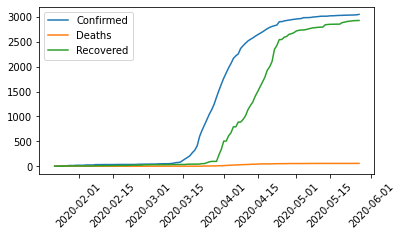

In [18]:
country = 'Thailand'

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=45)
plt.plot(concatenated_df[concatenated_df['Country_Region'] == country][['Confirmed', 'Deaths', 'Recovered']].groupby('date').sum())

plt.legend(['Confirmed', 'Deaths', 'Recovered'])

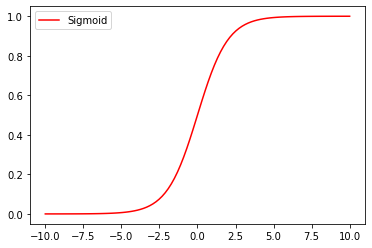

In [24]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
x=np.linspace(-10,10,100)
plt.plot(x,sigmoid(x),'r', label='Sigmoid')
plt.legend()

In [0]:
concatenated_df.to_csv('/content/drive/My Drive/Colab Notebooks/COVID19/covid19_data.csv', index=False)